In [1]:
#JALANKAN INI
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

class PrioritySeatViolationTracker:
    """Enhanced Priority Seat Violation Tracker dengan visualisasi yang diperbaiki"""
    
    def __init__(self):
        self.violations = []
        self.statistics = {
            'total_violations': 0,
            'violations_by_type': {},
            'violations_by_age_group': {},
            'avg_confidence': 0.0
        }
        
    def log_violation(self, person_id, violation_type, age_group=None, confidence=0.0):
        """Log pelanggaran dengan informasi lengkap"""
        violation = {
            'timestamp': datetime.now(),
            'person_id': person_id,
            'violation_type': violation_type,
            'age_group': age_group or 'unknown',
            'confidence': confidence,
            'session_id': f"session_{datetime.now().strftime('%Y%m%d_%H')}"
        }
        
        self.violations.append(violation)
        self._update_statistics()
        
        print(f"🚨 Violation logged: Person {person_id} - {violation_type} ({age_group}, conf: {confidence:.2f})")
    
    def _update_statistics(self):
        """Update statistik internal"""
        if not self.violations:
            return
            
        self.statistics['total_violations'] = len(self.violations)
        
        # By type
        type_counts = {}
        age_counts = {}
        total_confidence = 0
        
        for v in self.violations:
            # Count by type
            v_type = v['violation_type']
            type_counts[v_type] = type_counts.get(v_type, 0) + 1
            
            # Count by age group
            age_group = v['age_group']
            age_counts[age_group] = age_counts.get(age_group, 0) + 1
            
            # Sum confidence
            total_confidence += v['confidence']
        
        self.statistics['violations_by_type'] = type_counts
        self.statistics['violations_by_age_group'] = age_counts
        self.statistics['avg_confidence'] = total_confidence / len(self.violations) if self.violations else 0.0
    
    def get_summary(self):
        """Dapatkan ringkasan pelanggaran"""
        if not self.violations:
            return "📊 SGP-NET VIOLATION SUMMARY: No violations detected in this session."
        
        summary = [
            "\n📊 SGP-NET VIOLATION SUMMARY:",
            "=" * 50,
            f"Total Violations: {self.statistics['total_violations']}",
            f"Average Confidence: {self.statistics['avg_confidence']:.3f}",
            "",
            "🚨 Violations by Type:"
        ]
        
        for v_type, count in self.statistics['violations_by_type'].items():
            summary.append(f"   {v_type}: {count}")
        
        summary.extend([
            "",
            "👥 Violations by Age Group:"
        ])
        
        for age_group, count in self.statistics['violations_by_age_group'].items():
            summary.append(f"   {age_group}: {count}")
        
        summary.extend([
            "",
            f"📅 Session Duration: {self._get_session_duration()}",
            "=" * 50
        ])
        
        return "\n".join(summary)
    
    def _get_session_duration(self):
        """Hitung durasi sesi"""
        if len(self.violations) < 2:
            return "N/A"
        
        start_time = min(v['timestamp'] for v in self.violations)
        end_time = max(v['timestamp'] for v in self.violations)
        duration = end_time - start_time
        
        return str(duration).split('.')[0]  # Remove microseconds
    
    def show_comprehensive_visualization(self):
        """Tampilkan visualisasi lengkap dengan handling untuk data kosong"""
        try:
            plt.style.use('seaborn-v0_8')
        except:
            plt.style.use('default')
        
        # Setup figure
        fig = plt.figure(figsize=(16, 12))
        fig.suptitle('🧠 SGP-NET: Priority Seat Violation Analysis', fontsize=16, fontweight='bold')
        
        if not self.violations:
            # Tampilkan pesan "No violations" jika data kosong
            ax = fig.add_subplot(1, 1, 1)
            ax.text(0.5, 0.5, '🎉 NO VIOLATIONS DETECTED!\n\nSGP-NET System Working Perfectly', 
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=20, fontweight='bold', color='green',
                    transform=ax.transAxes)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis('off')
            
            # Tambah informasi sistem
            system_info = f"""
📊 System Status: OPERATIONAL
🎯 Detection Mode: SGP-NET (Scene Graph Priority Network)
⏱️  Session Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
🔍 Monitoring: Priority seat compliance
✅ Result: No violations detected in this session
            """
            
            ax.text(0.5, 0.2, system_info, horizontalalignment='center',
                    fontsize=12, transform=ax.transAxes, 
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7))
            
        else:
            # Jika ada data, tampilkan visualisasi lengkap
            self._create_violation_charts(fig)
        
        plt.tight_layout()
        plt.show(block=True)  # Pastikan plot tidak langsung tertutup
        
        # Simpan otomatis
        filename = f"sgp_violation_analysis_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"📁 Visualization saved as: {filename}")
        
        # Tunggu input user sebelum menutup
        input("\n👆 Press Enter to close the visualization...")
        plt.close()
    
    def _create_violation_charts(self, fig):
        """Buat chart untuk data pelanggaran"""
        df = pd.DataFrame(self.violations)
        
        # 1. Violations by Type
        ax1 = fig.add_subplot(2, 3, 1)
        type_counts = df['violation_type'].value_counts()
        colors = plt.cm.Set3(range(len(type_counts)))
        bars = ax1.bar(range(len(type_counts)), type_counts.values, color=colors)
        ax1.set_title('🚨 Violations by Type', fontweight='bold')
        ax1.set_xticks(range(len(type_counts)))
        ax1.set_xticklabels([t.replace('_', '\n') for t in type_counts.index], rotation=45, ha='right')
        ax1.set_ylabel('Count')
        
        # Tambah nilai di atas bar
        for bar, value in zip(bars, type_counts.values):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                     str(value), ha='center', va='bottom', fontweight='bold')
        
        # 2. Violations by Age Group
        ax2 = fig.add_subplot(2, 3, 2)
        age_counts = df['age_group'].value_counts()
        wedges, texts, autotexts = ax2.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%',
                                           colors=plt.cm.Pastel1(range(len(age_counts))))
        ax2.set_title('👥 Violations by Age Group', fontweight='bold')
        
        # 3. Timeline
        ax3 = fig.add_subplot(2, 3, 3)
        df['hour'] = df['timestamp'].dt.hour
        hourly_counts = df['hour'].value_counts().sort_index()
        ax3.plot(hourly_counts.index, hourly_counts.values, marker='o', linewidth=2, markersize=6)
        ax3.set_title('⏰ Violations Timeline (Hourly)', fontweight='bold')
        ax3.set_xlabel('Hour of Day')
        ax3.set_ylabel('Violations Count')
        ax3.grid(True, alpha=0.3)
        
        # 4. Confidence Distribution
        ax4 = fig.add_subplot(2, 3, 4)
        ax4.hist(df['confidence'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        ax4.axvline(df['confidence'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {df["confidence"].mean():.3f}')
        ax4.set_title('📊 Confidence Distribution', fontweight='bold')
        ax4.set_xlabel('Confidence Score')
        ax4.set_ylabel('Frequency')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        # 5. Violation Heatmap by Hour and Age Group
        ax5 = fig.add_subplot(2, 3, 5)
        pivot_table = df.pivot_table(values='person_id', index='hour', columns='age_group', 
                                     aggfunc='count', fill_value=0)
        if not pivot_table.empty:
            sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', ax=ax5)
            ax5.set_title('🔥 Violation Heatmap\n(Hour vs Age Group)', fontweight='bold')
        else:
            ax5.text(0.5, 0.5, 'No data for heatmap', ha='center', va='center', transform=ax5.transAxes)
            ax5.set_title('🔥 Violation Heatmap', fontweight='bold')
        
        # 6. Summary Statistics
        ax6 = fig.add_subplot(2, 3, 6)
        ax6.axis('off')
        
        stats_text = f"""
📊 SUMMARY STATISTICS

Total Violations: {len(df)}
Unique Persons: {df['person_id'].nunique()}
Avg Confidence: {df['confidence'].mean():.3f}
Most Common Type: {df['violation_type'].mode().iloc[0]}
Most Common Age: {df['age_group'].mode().iloc[0]}
Peak Hour: {df['hour'].mode().iloc[0]}:00

🎯 Session Duration: {self._get_session_duration()}
📅 Period: {df['timestamp'].min().strftime('%H:%M')} - {df['timestamp'].max().strftime('%H:%M')}
        """
        
        ax6.text(0.1, 0.9, stats_text, transform=ax6.transAxes, fontsize=11,
                 verticalalignment='top', fontfamily='monospace',
                 bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    def show_simple_chart(self):
        """Versi sederhana untuk kompatibilitas dengan kode lama"""
        self.show_comprehensive_visualization()
    
    def export_csv(self):
        """Export data ke CSV"""
        if not self.violations:
            print("📄 No violation data to export.")
            return "No data to export."
        
        try:
            df = pd.DataFrame(self.violations)
            filename = f"sgp_violations_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
            df.to_csv(filename, index=False)
            print(f"📁 Violation data exported to: {filename}")
            return f"Data exported to {filename}"
        except Exception as e:
            print(f"❌ Export error: {e}")
            return f"Export failed: {e}"
    
    def clear_violations(self):
        """Bersihkan data pelanggaran"""
        self.violations.clear()
        self.statistics = {
            'total_violations': 0,
            'violations_by_type': {},
            'violations_by_age_group': {},
            'avg_confidence': 0.0
        }
        print("🧹 Violation data cleared.")

In [ ]:
#JALANKAN INI
import os
import cv2
import torch
import numpy as np
import pandas as pd
from PIL import Image
import torch.nn as nn 
from datetime import datetime, timedelta
from ultralytics import YOLO
from transformers import AutoImageProcessor, AutoModelForImageClassification
import tensorflow as tf

# ⚠️ TAMBAHAN IMPORT YANG HILANG ⚠️
import torchvision.transforms as transforms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Audio Module ---
from gtts import gTTS
from playsound import playsound
import threading
import time
import logging

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

# =================================
# DEFINISI ARSITEKTUR MODEL PYTORCH
# =================================
class SimpleAgeCNN(nn.Module):
    def __init__(self, num_classes, img_size=128):
        super(SimpleAgeCNN, self).__init__()
        self.img_size = img_size
        
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        flattened_size = 128 * (self.img_size // 8) * (self.img_size // 8)
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_size, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.classifier(x)
        return x

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class SGPNetPrioritySeatDetector:

    def __init__(self, camera_index=0, crutches_model_path=None, mask_model_path=None):
        self.violation_tracker = PrioritySeatViolationTracker()
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"\n🖥️ SGP-NET menggunakan device: {self.device.upper()}")

        # Load models
        self._load_models(crutches_model_path, mask_model_path)

        # Initialize Camera
        if camera_index is not None:
            self.cap = cv2.VideoCapture(camera_index)
            if not self.cap.isOpened():
                raise IOError("Kamera tidak ditemukan")
        else:
            self.cap = None

        self.FONT = cv2.FONT_HERSHEY_SIMPLEX

        # SGP-NET Scene Graph Configuration
        self.scene_graph = {}  # Store scene relationships
        self.spatial_threshold = 150  # Spatial relationship threshold

        # ============ IMPROVED AGE GROUPS MAPPING ============
        self.AGE_GROUPS = {
            'child': ['01', '02', '03', '04', '05', '06-07', '08-09', '0-2', '3-9', '0-8', 'under_8', 'baby', 'child', 'kid', 'toddler', '0-4', '5-9'],
            'teenager': ['10-12', '13-15', '16-20', '10-19', '13-19', 'teenager', 'teen', 'adolescent'],
            'adult': ['21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '20-54', '20-29', '30-39', '40-49', '50-54', 'adult', 'young_adult', 'middle_aged'],
            'elderly': ['56-60', '61-65', '66-70', '71-80', '81-90', '90+', '55+', '55-59', '60+', '60-69', '70+', '70-79', '80+', '80-89', '90-99', 'over_55', 'over_60', 'over_70', 'senior', 'elderly']
        }

        # Thresholds yang diperjelas
        self.CRUTCH_DISTANCE_THRESHOLD = 120  
        self.CRUTCH_CONFIDENCE_THRESHOLD = 0.7  
        self.AGE_CONFIDENCE_THRESHOLD = 0.15    
        self.MASK_CONFIDENCE_THRESHOLD = 0.95 
        self.MIN_DETECTION_FRAMES = 5          
        self.CRUTCH_AREA_THRESHOLD = 300       
        self.PERSON_CRUTCH_HEIGHT_RATIO = 0.4 
        
        self.DEBUG_MODE = True
        self.XAI_MODE = True  # Explainable AI mode

        self.COLORS = {
            "high_priority": (0, 255, 0),      
            "low_priority": (0, 0, 255),       
            "verification": (255, 165, 0),     
            "analyzing": (128, 128, 128)       
        }

        self.tracked_data = {}
        self.logs = []
        self.xai_explanations = {}  

        # Audio control
        self.audio_playing = False
        self.audio_lock = threading.Lock()
        self.audio_cooldown = timedelta(seconds=5) 
        self.last_audio_times = {}

        # Prepare audio files
        self._prepare_audio_files()

        print("SGP-NET Priority Seat Detection System initialized")
        print("Scene Graph Priority Network - Analyzing spatial and contextual relationships")

    def _load_models(self, crutches_model_path, mask_model_path):
        """Load semua model dengan validasi path yang lebih baik"""
        try:
            print("📥 Loading YOLO models...")
            self.yolo_people = YOLO("yolov8n.pt")
        
            # Load crutches model
            if crutches_model_path and os.path.exists(crutches_model_path):
                self.yolo_crutches = YOLO(crutches_model_path)
                print(f"✅ Crutches model loaded from: {crutches_model_path}")
            else:
                print("⚠️ Crutches model not found, using fallback")
                self.yolo_crutches = None
        
            print("📥 Loading PyTorch age classification model...")
            
            age_model_path = '/Users/liviajunike/Desktop/Gemastik18/best_age_model.pth'
            
            self.age_labels = [
                '01', '02', '03', '04', '05', '06-07', '08-09', '10-12', '13-15', 
                '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', 
                '51-55', '56-60', '61-65', '66-70', '71-80', '81-90', '90+'
            ]
            
            num_age_classes = len(self.age_labels) # 23 classes
            self.age_input_size = (128, 128)
            
            # PREPROCESSING
            self.age_transform = transforms.Compose([
                transforms.Resize(self.age_input_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])
            
            try:
                if not os.path.exists(age_model_path):
                    print(f"❌ File model .pth tidak ditemukan di: {age_model_path}")
                    print("💡 Silakan sesuaikan path model di fungsi _load_models()")
                    self.my_age_model_pytorch = None
                else:
                    self.my_age_model_pytorch = SimpleAgeCNN(num_classes=num_age_classes, img_size=self.age_input_size[0])
                    
                    state_dict = torch.load(age_model_path, map_location=torch.device(self.device))
                    
                    if 'model_state_dict' in state_dict:
                        state_dict = state_dict['model_state_dict']
                    elif 'state_dict' in state_dict:
                        state_dict = state_dict['state_dict']
                    
                    self.my_age_model_pytorch.load_state_dict(state_dict)
                    self.my_age_model_pytorch.to(self.device)
                    self.my_age_model_pytorch.eval()
                    
                    print(f"✅ PyTorch Age model loaded successfully!")
                    print(f"   📊 Classes: {num_age_classes}")
                    print(f"   📐 Input size: {self.age_input_size}")
                    print(f"   🏷️ Labels: {self.age_labels[:5]}...{self.age_labels[-3:]}")
    
            except Exception as e:
                print(f"❌ Error loading PyTorch age model: {e}")
                print(f"💡 Pastikan arsitektur model sesuai dengan file .pth Anda")
                self.my_age_model_pytorch = None
                
        
            # Load mask model
            print("📥 Loading mask detection model...")
            self.custom_mask_model = None
            self.mask_input_size = (150, 150)
        
            if mask_model_path and os.path.exists(mask_model_path):
                try:
                    self.custom_mask_model = tf.keras.models.load_model(mask_model_path)
                    input_shape = self.custom_mask_model.input_shape
                    if len(input_shape) >= 3:
                        self.mask_input_size = (input_shape[1], input_shape[2])
                    print(f"✅ Custom mask model loaded from: {mask_model_path}")
                except Exception as e:
                    print(f"❌ Error loading mask model: {e}")
                    self.custom_mask_model = None
                
            if self.custom_mask_model is None:
                print("⚠️ Mask detection disabled")
        
        except Exception as e:
            print(f"❌ Error loading models: {e}")
            raise

    def _prepare_audio_files(self):
        """Prepare audio files for feedback dengan pesan yang lebih bersih"""
        print("🔊 Preparing audio files...")
        self.audio_files = {
            "remove_mask": "sgp_remove_mask.mp3",
            "low_priority": "sgp_low_priority.mp3",
        }
    
        messages = {
            "remove_mask": "Mohon lepas masker untuk verifikasi usia anda",
            "low_priority": "Anda bukan penumpang prioritas. Mohon berikan tempat untuk balita, lansia, atau pengguna alat bantu.",
        }
    
        for key, filename in self.audio_files.items():
            if not os.path.exists(filename):
                try:
                    tts = gTTS(text=messages[key], lang='id', slow=False)
                    tts.save(filename)
                except Exception as e:
                    print(f"❌ Error creating audio {filename}: {e}")

    def _build_scene_graph(self, people_boxes, crutches_boxes, frame_shape):
        """SGP-NET Core: Build Scene Graph untuk analisis relasi spasial"""
        scene_graph = {
            'nodes': {},  # People and objects
            'edges': {},  # Spatial relationships
            'context': {  # Global scene context
                'frame_size': frame_shape,
                'total_people': len(people_boxes),
                'total_crutches': len(crutches_boxes),
                'density': len(people_boxes) / (frame_shape[0] * frame_shape[1]) * 10000
            }
        }

        # Add people nodes
        for i, (person_id, box) in enumerate(people_boxes.items()):
            scene_graph['nodes'][f'person_{person_id}'] = {
                'type': 'person',
                'id': person_id,
                'bbox': box,
                'center': self._get_center(box),
                'area': (box[2] - box[0]) * (box[3] - box[1])
            }

        # Add crutches nodes
        for i, crutch_box in enumerate(crutches_boxes):
            scene_graph['nodes'][f'crutch_{i}'] = {
                'type': 'crutch',
                'bbox': crutch_box,
                'center': self._get_center(crutch_box),
                'area': (crutch_box[2] - crutch_box[0]) * (crutch_box[3] - crutch_box[1])
            }

        # Build spatial relationships (edges)
        self._compute_spatial_relationships(scene_graph)

        return scene_graph

    def _compute_spatial_relationships(self, scene_graph):
        """Compute spatial relationships between nodes"""
        nodes = list(scene_graph['nodes'].keys())

        for i, node1_key in enumerate(nodes):
            for j, node2_key in enumerate(nodes[i+1:], i+1):
                node1 = scene_graph['nodes'][node1_key]
                node2 = scene_graph['nodes'][node2_key]
                
                center1 = node1['center']
                center2 = node2['center']

                distance = np.linalg.norm(np.array(center1) - np.array(center2))

                # Define relationship based on distance and types
                relationship = self._classify_spatial_relationship(
                    node1,
                    node2,
                    distance
                )

                if relationship:
                    edge_key = f"{node1_key}_{node2_key}"
                    scene_graph['edges'][edge_key] = relationship

    def _classify_spatial_relationship(self, node1, node2, distance):
        """Classify spatial relationship dengan validasi yang diperbaiki"""
        
        # Person-Crutch relationship dengan validasi yang lebih permisif tapi tetap akurat
        if (node1['type'] == 'person' and node2['type'] == 'crutch') or \
           (node1['type'] == 'crutch' and node2['type'] == 'person'):
            
            # Tentukan mana person dan mana crutch
            if node1['type'] == 'person':
                person_node, crutch_node = node1, node2
            else:
                person_node, crutch_node = node2, node1
            
            # VALIDASI 1: Jarak tidak terlalu jauh
            if distance > self.CRUTCH_DISTANCE_THRESHOLD:
                return None
                
            # VALIDASI 2: Area kruk reasonable (lebih permisif)
            crutch_area = crutch_node['area']
            if crutch_area < self.CRUTCH_AREA_THRESHOLD:
                return None
                
            # VALIDASI 3: Posisi relatif - kruk harus di sekitar kaki/bawah orang
            person_bbox = person_node['bbox']
            crutch_bbox = crutch_node['bbox']
            
            person_bottom = person_bbox[3]  # y2 of person
            person_height = person_bbox[3] - person_bbox[1]
            crutch_center_y = (crutch_bbox[1] + crutch_bbox[3]) / 2
            
            # Kruk harus berada di bagian bawah orang (lebih fleksibel)
            height_threshold = person_bbox[1] + (person_height * 0.4)  # Mulai dari 40% tinggi orang
            
            if crutch_center_y < height_threshold:
                return None  # Kruk terlalu tinggi
                
            # VALIDASI 4: Overlap horizontal - tidak terlalu ketat
            person_center_x = (person_bbox[0] + person_bbox[2]) / 2
            crutch_center_x = (crutch_bbox[0] + crutch_bbox[2]) / 2
            horizontal_distance = abs(person_center_x - crutch_center_x)
            
            person_width = person_bbox[2] - person_bbox[0]
            if horizontal_distance > person_width * 1.2:  # Lebih permisif
                return None
            
            # Hitung confidence berdasarkan proximitas
            distance_confidence = max(0.5, 1.0 - distance / self.CRUTCH_DISTANCE_THRESHOLD)
            position_confidence = 1.0 - (horizontal_distance / (person_width * 1.2))
            
            # Final confidence
            final_confidence = (distance_confidence + position_confidence) / 2
            
            if final_confidence < 0.5:  # Threshold lebih rendah
                return None
                
            return {
                'type': 'uses_assistive_device',
                'distance': distance,
                'confidence': final_confidence,
                'validation': {
                    'distance_ok': True,
                    'area_ok': True,
                    'position_ok': True,
                    'horizontal_ok': True
                }
            }
        
        # Person-Person relationships
        elif node1['type'] == 'person' and node2['type'] == 'person':
            if distance < self.spatial_threshold:
                return {
                    'type': 'nearby',
                    'distance': distance,
                    'confidence': max(0.3, 1.0 - distance / self.spatial_threshold)
                }
        
        return None

    def _validate_crutch_detection(self, crutch_results, frame_shape):
        """Validasi deteksi kruk yang lebih permisif tapi tetap akurat"""
        if crutch_results.boxes is None:
            return []
        
        validated_crutches = []
        
        for box in crutch_results.boxes:
            conf = float(box.conf[0])
            coords = box.xyxy[0].cpu().numpy()
            
            # Validasi 1: Confidence threshold
            if conf < self.CRUTCH_CONFIDENCE_THRESHOLD:
                continue
                
            # Validasi 2: Ukuran reasonable
            width = coords[2] - coords[0]
            height = coords[3] - coords[1]
            area = width * height
            
            if height == 0 or width == 0:
                continue
            
            # Area harus reasonable
            if area < self.CRUTCH_AREA_THRESHOLD or area > frame_shape[0] * frame_shape[1] * 0.15:
                continue
                
            # Aspect ratio tidak terlalu ketat - kruk bisa dalam berbagai posisi
            aspect_ratio = height / width
            if aspect_ratio < 1.2:  # Lebih permisif untuk kruk horizontal/miring
                continue
                
            validated_crutches.append(coords)
        
        return validated_crutches

    def _sgp_priority_inference(self, person_id, person_data, scene_graph):
        """SGP-NET Priority Inference dengan logika yang diperbaiki"""
        # Ekstrak data yang relevan
        age_group = person_data.get("age_group", "adult")
        age_confidence = person_data.get("age_confidence", 0.0)
        wearing_mask = person_data.get("wearing_mask", False)
        mask_confidence = person_data.get("mask_confidence", 0.0)
        detection_frames = person_data.get("detection_frames", 0)

        # Buat dasar penjelasan XAI
        xai_factors = {
            'crutch_detected': False, 'age_group': age_group,
            'age_confidence': age_confidence, 'mask_detected': wearing_mask,
            'mask_confidence': mask_confidence,
            'detection_stability': detection_frames >= self.MIN_DETECTION_FRAMES,
            'decision_factors': []
        }

        # Cek relasi dengan kruk dari Scene Graph
        person_node = f'person_{person_id}'
        uses_crutches = False
        crutch_confidence = 0.0
        for edge_key, edge_data in scene_graph.get('edges', {}).items():
            if person_node in edge_key and edge_data.get('type') == 'uses_assistive_device':
                if edge_data.get('confidence', 0) >= 0.5:
                    uses_crutches = True
                    crutch_confidence = max(crutch_confidence, edge_data['confidence'])
        
        xai_factors['crutch_detected'] = uses_crutches
        xai_factors['crutch_confidence'] = crutch_confidence

        # HIERARKI KEPUTUSAN (IF-ELIF-ELSE)
        # PRIORITAS 1: PENGGUNA KRUK (Final, mengabaikan yang lain)
            # PRIORITAS 1: PENGGUNA KRUK (Final, NO AUDIO)
        if uses_crutches:
            xai_factors['decision_factors'].append('Crutch detected, overriding other checks.')
            return {
                'priority_level': 1, 'priority_class': 'high_priority',
                'reason': f"PENGGUNA KRUK (Conf: {crutch_confidence:.2f})",
                'audio_key': None,
                'confidence': crutch_confidence,
                'sgp_decision': 'crutch_user_priority', 'xai_explanation': xai_factors
            }
        
        # PRIORITAS 2: MEMAKAI MASKER (Memblokir analisis usia, DENGAN AUDIO)
        elif wearing_mask and mask_confidence >= self.MASK_CONFIDENCE_THRESHOLD:
            xai_factors['decision_factors'].append('Mask detected, requires verification before age check.')
            return {
                'priority_level': 0, 'priority_class': 'verification',
                'reason': f"LEPAS MASKER (Conf: {mask_confidence:.2f})",
                'audio_key': 'remove_mask', 'confidence': mask_confidence,
                'sgp_decision': 'mask_verification_required', 'xai_explanation': xai_factors
            }
    
        # PRIORITAS 3: NO AUDIO
        elif detection_frames < self.MIN_DETECTION_FRAMES:
            xai_factors['decision_factors'].append(f'Detection is not yet stable ({detection_frames}/{self.MIN_DETECTION_FRAMES}).')
            return {
                'priority_level': -1, 'priority_class': 'analyzing',
                'reason': f"MENGANALISIS... ({detection_frames}/{self.MIN_DETECTION_FRAMES})",
                'audio_key': None, 'confidence': 0.5,
                'sgp_decision': 'analyzing_person', 'xai_explanation': xai_factors
            }
    
        # PRIORITAS 4: KEPUTUSAN FINAL BERDASARKAN USIA
        else:
            # USIA PRIORITAS TINGGI (Balita & Lansia) - NO AUDIO
            if age_group in ['child', 'elderly'] and age_confidence >= self.AGE_CONFIDENCE_THRESHOLD:
                category = "BALITA" if age_group == 'child' else "LANSIA"
                xai_factors['decision_factors'].append(f'Stable detection, no mask/crutches. Classified as priority age group: {category}.')
                return {
                    'priority_level': 1, 'priority_class': 'high_priority',
                    'reason': f"{category} TERVERIFIKASI (Conf: {age_confidence:.2f})",
                    'audio_key': None,
                    'confidence': age_confidence,
                    'sgp_decision': f'{age_group}_age_priority', 'xai_explanation': xai_factors
                }
            # USIA BUKAN PRIORITAS (Dewasa & Remaja) - DENGAN AUDIO
            else:
                category = "DEWASA/REMAJA"
                xai_factors['decision_factors'].append(f'Stable detection, no mask/crutches. Classified as non-priority age group.')
                self.violation_tracker.log_violation(
                    person_id, 'NON_PRIORITY_SITTING', 
                    age_group, age_confidence
                )
                return {
                    'priority_level': 2, 'priority_class': 'low_priority',
                    'reason': f"{category} - BUKAN PRIORITAS",
                    'audio_key': 'low_priority', 'confidence': age_confidence,
                    'sgp_decision': 'non_priority_person', 'xai_explanation': xai_factors
                }
                    

    def _get_center(self, box):
        """Get center point of bounding box"""
        return int((box[0] + box[2]) / 2), int((box[1] + box[3]) / 2)

    def _classify_person(self, image_crop):
        """IMPROVED classification dengan debugging yang lebih baik"""
        if image_crop is None or image_crop.size == 0:
            return "unknown", "no_mask", 0.0, 0.0
    
        try:
            # Default values
            age_label, age_confidence = "adult", 0.5
            mask_label, mask_confidence = "no_mask", 0.0
    
            # ================= AGE CLASSIFICATION =================
            if self.my_age_model_pytorch is not None:
                try:
                    # Konversi BGR (OpenCV) ke RGB dan PIL Image
                    image_rgb = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)
                    pil_img = Image.fromarray(image_rgb)
                    
                    # Terapkan transformasi yang sudah disiapkan
                    input_tensor = self.age_transform(pil_img)
                    
                    # Tambahkan batch dimension dan pindah ke device
                    input_batch = input_tensor.unsqueeze(0).to(self.device)
                    
                    # Lakukan prediksi dengan gradient disabled
                    with torch.no_grad():
                        outputs = self.my_age_model_pytorch(input_batch)
                        
                        # Interpretasi hasil dengan softmax
                        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
                        top_prob, top_catid = torch.max(probabilities, 0)
                        
                        # Extract values
                        age_confidence = float(top_prob.item())
                        predicted_class_idx = int(top_catid.item())
                        
                        # Validasi index
                        if 0 <= predicted_class_idx < len(self.age_labels):
                            age_label = self.age_labels[predicted_class_idx]
                        else:
                            print(f"⚠️ Predicted index {predicted_class_idx} out of range [0, {len(self.age_labels)-1}]")
                            age_label = "adult"
                            age_confidence = 0.5
    
                    if self.DEBUG_MODE:
                        print(f"🧠 Age prediction: {age_label} (conf: {age_confidence:.3f}, idx: {predicted_class_idx})")
                        # Print top 3 predictions for debugging
                        top3_probs, top3_indices = torch.topk(probabilities, 3)
                        print(f"   Top 3: {[(self.age_labels[idx.item()], prob.item()) for idx, prob in zip(top3_indices, top3_probs)]}")
    
                except Exception as e:
                    print(f"❌ Age classification error: {e}")
                    import traceback
                    traceback.print_exc()
                    age_label, age_confidence = "adult", 0.5
            else:
                print("⚠️ Age model not loaded, using default values")
            
            # ================= MASK CLASSIFICATION =================
            if self.custom_mask_model is not None:
                try:
                    # Convert ke PIL Image untuk Keras
                    pil_img_mask = Image.fromarray(cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB))
                    mask_img_resized = pil_img_mask.resize(self.mask_input_size, Image.Resampling.LANCZOS)
                    mask_img_array = np.array(mask_img_resized).astype(np.float32) / 255.0
                    mask_img_array = np.expand_dims(mask_img_array, axis=0)
    
                    mask_predictions = self.custom_mask_model.predict(mask_img_array, verbose=0)
    
                    if len(mask_predictions.shape) == 2 and mask_predictions.shape[1] == 2:
                        prob_no_mask = float(mask_predictions[0][0])
                        prob_mask = float(mask_predictions[0][1])
                        if prob_mask > prob_no_mask:
                            mask_label = "mask"
                            mask_confidence = prob_mask
                        else:
                            mask_label = "no_mask"
                            mask_confidence = prob_no_mask
                        
                        if self.DEBUG_MODE:
                            print(f"😷 Mask prediction: {mask_label} (conf: {mask_confidence:.3f})")
                    
                except Exception as e:
                    print(f"❌ Mask classification error: {e}")
            
            return age_label, mask_label, age_confidence, mask_confidence
    
        except Exception as e:
            print(f"❌ Person classification error: {e}")
            return "adult", "no_mask", 0.5, 0.5

    def _get_age_group(self, age_label, confidence):
        """IMPROVED age group classification dengan mapping yang lebih akurat"""
        age_label_lower = age_label.lower().strip()

        if self.DEBUG_MODE:
            print(f"🔍 Age group mapping: '{age_label}' -> confidence: {confidence:.3f}")

        # LANGKAH 1: Cek kategori prioritas tinggi (balita/lansia) dengan threshold rendah
        for label in self.AGE_GROUPS['child']:
            if label.lower() in age_label_lower or age_label_lower in label.lower():
                if confidence > 0.1:
                    if self.DEBUG_MODE:
                        print(f"   ✅ Matched CHILD: {label}")
                    return 'child'
        
        for label in self.AGE_GROUPS['elderly']:
            if label.lower() in age_label_lower or age_label_lower in label.lower():
                if confidence > 0.1:
                    if self.DEBUG_MODE:
                        print(f"   ✅ Matched ELDERLY: {label}")
                    return 'elderly'

        # LANGKAH 2: Jika confidence terlalu rendah untuk kategori lain, default ke adult
        if confidence < self.AGE_CONFIDENCE_THRESHOLD:
            if self.DEBUG_MODE:
                print(f"   ⚠️ Low confidence ({confidence:.3f}), defaulting to adult")
            return 'adult'

        # LANGKAH 3: Cek remaja dan dewasa dengan confidence yang cukup
        for group, labels in self.AGE_GROUPS.items():
            if group in ['child', 'elderly']:
                continue
            for label in labels:
                if label.lower() in age_label_lower or age_label_lower in label.lower():
                    if self.DEBUG_MODE:
                        print(f"   ✅ Matched {group.upper()}: {label}")
                    return group
        
        # Fallback
        if self.DEBUG_MODE:
            print(f"   ⚠️ No match found, defaulting to adult")
        return 'adult'

    def _is_wearing_mask(self, mask_label, confidence):
        """Deteksi masker dengan threshold yang disesuaikan"""
        CONFIDENCE_THRESHOLD = 0.75
        
        if confidence < CONFIDENCE_THRESHOLD:
            return False
        
        mask_label_lower = mask_label.lower().strip()
        
        # Keywords untuk deteksi masker
        mask_positive_keywords = ['mask', 'with_mask', 'wearing_mask', 'masked']
        mask_negative_keywords = ['no_mask', 'without_mask', 'not_wearing', 'unmasked']
        
        # Cek negative keywords dulu
        for keyword in mask_negative_keywords:
            if keyword in mask_label_lower:
                return False
        
        # Cek positive keywords dengan confidence
        for keyword in mask_positive_keywords:
            if keyword in mask_label_lower:
                return True
        
        return False

    def _play_audio_with_cooldown(self, audio_key, person_id):
        """Audio feedback with cooldown dan logging yang lebih bersih"""
        current_time = datetime.now()
    
        if person_id in self.last_audio_times:
            if current_time - self.last_audio_times[person_id] < self.audio_cooldown:
                return
    
        def play_audio():
            with self.audio_lock:
                self.audio_playing = True
                try:
                    if audio_key in self.audio_files and os.path.exists(self.audio_files[audio_key]):
                        if audio_key == 'remove_mask':
                            print(f"🔊 Audio: Verifikasi masker untuk person {person_id}")
                        elif audio_key == 'low_priority':
                            print(f"🔊 Audio: Peringatan non-prioritas untuk person {person_id}")
                        
                        playsound(self.audio_files[audio_key], block=True)
                except Exception as e:
                    print(f"❌ Audio error: {e}")
                finally:
                    self.audio_playing = False
    
        self.last_audio_times[person_id] = current_time
        threading.Thread(target=play_audio, daemon=True).start()

    def _draw_sgp_visualization(self, frame, box, priority_result, person_data, detection_frames):
        """Enhanced visualization dengan informasi yang lebih detail"""
        x1, y1, x2, y2 = map(int, box)
    
        priority_class = priority_result['priority_class']
        color = self.COLORS.get(priority_class, (128, 128, 128))
        
        # Status text berdasarkan prioritas
        if priority_result['priority_level'] == 1:
            status_text = "🟢 SGP: PRIORITAS TINGGI"
            border_thickness = 4
        elif priority_result['priority_level'] == 2:
            status_text = "🔴 SGP: BUKAN PRIORITAS"
            border_thickness = 2
        elif priority_result['priority_level'] == 0:
            status_text = "🟠 SGP: VERIFIKASI MASKER"
            border_thickness = 3
        else:
            status_text = "⚪ SGP: MENGANALISIS..."
            border_thickness = 2
    
        # Draw bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, border_thickness)
    
        # Status label dengan background
        label_size, _ = cv2.getTextSize(status_text, self.FONT, 0.6, 2)
        cv2.rectangle(frame, (x1, y1 - 35), (x1 + label_size[0] + 10, y1), color, -1)
        cv2.putText(frame, status_text, (x1 + 5, y1 - 10), self.FONT, 0.6, (255, 255, 255), 2)
    
        # XAI Explanation
        xai_explanation = priority_result.get('xai_explanation', {})
        wearing_mask = xai_explanation.get('mask_detected', False)
        mask_conf = xai_explanation.get('mask_confidence', 0.0)
        crutch_detected = xai_explanation.get('crutch_detected', False)
        crutch_conf = xai_explanation.get('crutch_confidence', 0.0)
        
        # Detailed information dengan XAI
        info_lines = [
            f"KEPUTUSAN: {priority_result['sgp_decision']}",
            f"ALASAN: {priority_result['reason']}",
            f"CONFIDENCE: {priority_result['confidence']:.3f}",
        ]
        
        # Tambah info XAI
        if crutch_detected:
            info_lines.append(f"🩼 KRUK: YA ({crutch_conf:.2f})")
        else:
            info_lines.append(f"🩼 KRUK: TIDAK")
            
        info_lines.extend([
            f"👤 USIA: {xai_explanation.get('age_group', 'unknown').upper()}",
            f"   Label: {person_data.get('age_label', 'unknown')}",
            f"   Conf: {xai_explanation.get('age_confidence', 0.0):.3f}",
            f"😷 MASKER: {'YA' if wearing_mask else 'TIDAK'} ({mask_conf:.2f})",
            f"📊 FRAMES: {detection_frames}/{self.MIN_DETECTION_FRAMES}"
        ])
        
        # XAI Decision Factors (hanya 2 teratas)
        decision_factors = xai_explanation.get('decision_factors', [])
        if decision_factors and self.XAI_MODE:
            info_lines.append("--- XAI EXPLANATION ---")
            for factor in decision_factors[:2]:
                # Truncate long factors
                truncated_factor = factor[:40] + "..." if len(factor) > 40 else factor
                info_lines.append(f"• {truncated_factor}")
    
        # Draw info dengan background yang dinamis
        max_width = max([cv2.getTextSize(line, self.FONT, 0.35, 1)[0][0] for line in info_lines]) + 10
        info_height = len(info_lines) * 14 + 10
        
        # Pastikan info box tidak keluar dari frame
        info_x = min(x1, frame.shape[1] - max_width)
        info_y = min(y2 + 5, frame.shape[0] - info_height)
        
        cv2.rectangle(frame, (info_x, info_y), (info_x + max_width, info_y + info_height), (0, 0, 0), -1)
        cv2.rectangle(frame, (info_x, info_y), (info_x + max_width, info_y + info_height), color, 1)
    
        for i, line in enumerate(info_lines):
            cv2.putText(frame, line, (info_x + 5, info_y + 18 + i * 13), self.FONT, 0.35, (255, 255, 255), 1)

    def process_frame(self, frame):
        """Main SGP-NET frame processing dengan error handling yang lebih baik"""
        try:
            # Detect crutches dengan validasi ketat
            crutches_boxes = []
            if self.yolo_crutches is not None:
                crutch_results = self.yolo_crutches(frame, verbose=False)[0]
                crutches_boxes = self._validate_crutch_detection(crutch_results, frame.shape)

            # Detect people
            person_results = self.yolo_people.track(frame, persist=True, classes=[0], verbose=False)[0]

            if person_results.boxes is None or person_results.boxes.id is None:
                return frame

            # Collect people boxes for scene graph
            people_boxes = {}
            for box in person_results.boxes:
                if box.id is None:
                    continue
                track_id = int(box.id[0])
                coords = box.xyxy[0].cpu().numpy()
                people_boxes[track_id] = coords

            # Build Scene Graph
            scene_graph = self._build_scene_graph(people_boxes, crutches_boxes, frame.shape)

            # Process each person dengan SGP-NET
            for box in person_results.boxes:
                if box.id is None:
                    continue

                track_id = int(box.id[0])
                coords = box.xyxy[0].cpu().numpy()

                # Initialize new person
                if track_id not in self.tracked_data:
                    x1, y1, x2, y2 = map(int, coords)
                    
                    # Validate crop bounds
                    crop_x1 = max(0, x1)
                    crop_y1 = max(0, y1)
                    crop_x2 = min(frame.shape[1], x2)
                    crop_y2 = min(frame.shape[0], y2)
                    
                    crop = frame[crop_y1:crop_y2, crop_x1:crop_x2]

                    if crop.size == 0:
                        continue

                    # Classify person dengan error handling
                    try:
                        age_label, mask_label, age_conf, mask_conf = self._classify_person(crop)
                        age_group = self._get_age_group(age_label, age_conf)
                        wearing_mask = self._is_wearing_mask(mask_label, mask_conf)
                    except Exception as e:
                        print(f"❌ Classification error for person {track_id}: {e}")
                        age_label, mask_label, age_conf, mask_conf = "adult", "no_mask", 0.5, 0.5
                        age_group = "adult"
                        wearing_mask = False

                    self.tracked_data[track_id] = {
                        "age_label": age_label,
                        "age_group": age_group,
                        "age_confidence": age_conf,
                        "mask_label": mask_label,
                        "mask_confidence": mask_conf,
                        "wearing_mask": wearing_mask,
                        "detection_frames": 0,
                        "audio_played": False,
                        "first_detected": datetime.now(),
                        "last_priority_decision": None
                    }

                    if self.DEBUG_MODE:
                        print(f"🆕 New person {track_id}: {age_label} -> {age_group} (conf: {age_conf:.3f})")

                # Update frame count
                self.tracked_data[track_id]["detection_frames"] += 1

                # SGP-NET Priority Inference
                priority_result = self._sgp_priority_inference(track_id, self.tracked_data[track_id], scene_graph)

                # Update last decision untuk tracking
                self.tracked_data[track_id]["last_priority_decision"] = priority_result['sgp_decision']

                # Audio feedback - play hanya untuk keputusan final
                if priority_result['audio_key'] and not self.tracked_data[track_id]["audio_played"]:
                    if priority_result['priority_level'] in [0, 2]:  # Mask verification atau Non-priority
                        self._play_audio_with_cooldown(priority_result['audio_key'], track_id)
                        self.tracked_data[track_id]["audio_played"] = True

                # Draw SGP-NET visualization
                self._draw_sgp_visualization(frame, coords, priority_result,
                                             self.tracked_data[track_id],
                                             self.tracked_data[track_id]["detection_frames"])

            # Draw system status
            self._draw_system_status(frame, people_boxes, scene_graph)

        except Exception as e:
            print(f"❌ SGP-NET frame processing error: {e}")
            import traceback
            traceback.print_exc()
            cv2.putText(frame, f"SGP-NET Error: {str(e)[:50]}", (10, frame.shape[0] - 30), self.FONT, 0.5, (0, 0, 255), 2)

        return frame

    def _draw_system_status(self, frame, people_boxes, scene_graph):
        """Draw system status information"""
        total_people = len(people_boxes)
        high_priority_count = 0
        low_priority_count = 0
        verification_count = 0
        
        for person_id, data in self.tracked_data.items():
            if person_id in people_boxes:  # Only count currently visible people
                result = self._sgp_priority_inference(person_id, data, scene_graph)
                if result['priority_level'] == 1:
                    high_priority_count += 1
                elif result['priority_level'] == 2:
                    low_priority_count += 1
                elif result['priority_level'] == 0:
                    verification_count += 1

        # System status
        sgp_info = f"SGP-NET | Terdeteksi: {total_people} | Prioritas: {high_priority_count} | Non-Prioritas: {low_priority_count} | Verifikasi: {verification_count}"
        cv2.putText(frame, sgp_info, (10, 30), self.FONT, 0.5, (255, 255, 255), 2)

        if self.DEBUG_MODE:
            # Debug info
            debug_lines = [
                f"Kruk Tervalidasi: {len(scene_graph.get('nodes', {}))} | Model Status: {'OK' if self.my_age_model_pytorch else 'FAILED'}",
                f"Scene Nodes: {len(scene_graph.get('nodes', {}))} | Edges: {len(scene_graph.get('edges', {}))}",
                f"Age Model: {'PyTorch OK' if self.my_age_model_pytorch else 'FAILED'} | Mask Model: {'OK' if self.custom_mask_model else 'DISABLED'}"
            ]
            
            for i, line in enumerate(debug_lines):
                cv2.putText(frame, line, (10, 60 + i * 20), self.FONT, 0.4, (200, 200, 200), 1)

    def run(self):
        """Run SGP-NET detection system"""
        print("🎥 Menjalankan SGP-NET: Scene Graph Priority Network")
        print("📋 Controls: [Q] = Quit, [R] = Reset, [S] = Statistics, [D] = Toggle Debug, [X] = Toggle XAI")
        print("🧠 SGP-NET: Menganalisis relasi spasial dan kontekstual untuk validasi prioritas")
        print("🏆 Prioritas Logic: 1) Kruk (Tertinggi) → 2) Balita/Lansia → 3) Masker (Verifikasi) → 4) Non-prioritas")

        try:
            while True:
                ret, frame = self.cap.read()
                if not ret:
                    print("❌ Failed to read frame")
                    break

                frame = self.process_frame(frame)
                cv2.imshow("🧠 SGP-NET: Scene Graph Priority Network (FIXED)", frame)

                key = cv2.waitKey(1) & 0xFF
                if key == ord("q"):
                    break
                elif key == ord("r"):
                    self.tracked_data.clear()
                    self.scene_graph.clear()
                    self.xai_explanations.clear()
                    print("🔄 SGP-NET data reset")
                elif key == ord("s"):
                    self._show_sgp_statistics()
                elif key == ord("d"):
                    self.DEBUG_MODE = not self.DEBUG_MODE
                    print(f"SGP-NET Debug mode: {'ON' if self.DEBUG_MODE else 'OFF'}")
                elif key == ord("x"):
                    self.XAI_MODE = not self.XAI_MODE
                    print(f"🤖 SGP-NET XAI mode: {'ON' if self.XAI_MODE else 'OFF'}")
                elif key == ord("v"):
                    print(self.violation_tracker.get_summary())

        except KeyboardInterrupt:
            print("SGP-NET interrupted by user")
        except Exception as e:
            print(f"SGP-NET system error: {e}")
        finally:
            self.cleanup()

    def _show_sgp_statistics(self):
        """Show comprehensive SGP-NET statistics"""
        if not self.tracked_data:
            print("📊 No SGP-NET data available")
            return
    
        print("\n📊 SGP-NET COMPREHENSIVE STATISTICS:")
        print("=" * 70)
    
        # Initialize counters
        priority_stats = {
            "🟢 PRIORITAS TINGGI": 0,
            "🔴 BUKAN PRIORITAS": 0,
            "🟠 VERIFIKASI MASKER": 0,
            "⚪ MENGANALISIS": 0
        }
        
        age_distribution = {}
        sgp_decisions = {}
        confidence_analysis = {
            'high_conf_age': 0,    # >= 0.8
            'medium_conf_age': 0,  # 0.5-0.8
            'low_conf_age': 0,     # < 0.5
            'avg_age_conf': 0.0,
            'avg_mask_conf': 0.0
        }
        
        xai_insights = {
            'crutch_users': 0,
            'elderly_priority': 0,
            'child_priority': 0,
            'mask_verifications': 0,
            'stable_detections': 0
        }
    
        mock_scene_graph = {'edges': {}, 'nodes': {}}
        total_age_conf = 0
        total_mask_conf = 0
        valid_detections = 0
        
        for person_id, data in self.tracked_data.items():
            if data["detection_frames"] >= self.MIN_DETECTION_FRAMES:
                valid_detections += 1
                priority_result = self._sgp_priority_inference(person_id, data, mock_scene_graph)
                xai_explanation = priority_result.get('xai_explanation', {})
    
                # Priority levels
                if priority_result['priority_level'] == 1:
                    priority_stats["🟢 PRIORITAS TINGGI"] += 1
                elif priority_result['priority_level'] == 2:
                    priority_stats["🔴 BUKAN PRIORITAS"] += 1
                elif priority_result['priority_level'] == 0:
                    priority_stats["🟠 VERIFIKASI MASKER"] += 1
                else:
                    priority_stats["⚪ MENGANALISIS"] += 1
    
                # Age distribution
                age_group = data["age_group"]
                age_distribution[age_group] = age_distribution.get(age_group, 0) + 1
    
                # SGP decisions
                sgp_decision = priority_result['sgp_decision']
                sgp_decisions[sgp_decision] = sgp_decisions.get(sgp_decision, 0) + 1
                
                # Confidence analysis
                age_conf = data.get('age_confidence', 0.0)
                mask_conf = data.get('mask_confidence', 0.0)
                
                total_age_conf += age_conf
                total_mask_conf += mask_conf
                
                if age_conf >= 0.8:
                    confidence_analysis['high_conf_age'] += 1
                elif age_conf >= 0.5:
                    confidence_analysis['medium_conf_age'] += 1
                else:
                    confidence_analysis['low_conf_age'] += 1
                
                # XAI Insights
                if xai_explanation.get('crutch_detected', False):
                    xai_insights['crutch_users'] += 1
                if 'elderly' in sgp_decision:
                    xai_insights['elderly_priority'] += 1
                if 'child' in sgp_decision:
                    xai_insights['child_priority'] += 1
                if 'mask' in sgp_decision:
                    xai_insights['mask_verifications'] += 1
                if xai_explanation.get('detection_stability', False):
                    xai_insights['stable_detections'] += 1
        
        # Calculate averages
        if valid_detections > 0:
            confidence_analysis['avg_age_conf'] = total_age_conf / valid_detections
            confidence_analysis['avg_mask_conf'] = total_mask_conf / valid_detections

        # Display results
        print(f"🏆 PRIORITY DISTRIBUTION:")
        for priority, count in priority_stats.items():
            percentage = (count / valid_detections * 100) if valid_detections > 0 else 0
            print(f"   {priority}: {count} orang ({percentage:.1f}%)")
            
        print(f"\n👥 AGE DISTRIBUTION:")
        for age, count in age_distribution.items():
            percentage = (count / valid_detections * 100) if valid_detections > 0 else 0
            print(f"   {age.upper()}: {count} orang ({percentage:.1f}%)")
            
        print(f"\n🧠 SGP DECISIONS:")
        for decision, count in sgp_decisions.items():
            print(f"   {decision}: {count}")
            
        print(f"\n📊 CONFIDENCE ANALYSIS:")
        print(f"   🟢 High Age Confidence (≥0.8): {confidence_analysis['high_conf_age']}")
        print(f"   🟡 Medium Age Confidence (0.5-0.8): {confidence_analysis['medium_conf_age']}")
        print(f"   🔴 Low Age Confidence (<0.5): {confidence_analysis['low_conf_age']}")
        print(f"   📈 Average Age Confidence: {confidence_analysis['avg_age_conf']:.3f}")
        print(f"   📈 Average Mask Confidence: {confidence_analysis['avg_mask_conf']:.3f}")
            
        print(f"\n🤖 XAI INSIGHTS:")
        print(f"   🩼 Pengguna Kruk: {xai_insights['crutch_users']}")
        print(f"   👴 Lansia Prioritas: {xai_insights['elderly_priority']}")
        print(f"   👶 Balita Prioritas: {xai_insights['child_priority']}")
        print(f"   😷 Perlu Verifikasi Masker: {xai_insights['mask_verifications']}")
        print(f"   ✅ Deteksi Stabil: {xai_insights['stable_detections']}")
        
        print(f"\n📈 SYSTEM PERFORMANCE:")
        print(f"   📊 Total Deteksi Valid: {valid_detections}")
        print(f"   📊 Total Deteksi Keseluruhan: {len(self.tracked_data)}")
        print(f"   🎯 Model Status:")
        print(f"      Age Model: {'✅ OK' if self.my_age_model_pytorch else '❌ FAILED'}")
        print(f"      Mask Model: {'✅ OK' if self.custom_mask_model else '⚠️ DISABLED'}")
        print(f"      Crutch Model: {'✅ OK' if self.yolo_crutches else '⚠️ DISABLED'}")
        
        print("=" * 70)

    # Perbaikan untuk fungsi cleanup() dalam SGPNetPrioritySeatDetector class

    def cleanup(self):
        """Clean up SGP-NET resources dengan visualisasi yang diperbaiki"""
        print("🧹 Cleaning up SGP-NET...")
    
        # Release camera dan close windows
        if self.cap:
            self.cap.release()
        cv2.destroyAllWindows()
    
        # Tampilkan visualisasi, bahkan jika tidak ada pelanggaran
        print("📊 Creating comprehensive violation analysis...")
        try:
            self.violation_tracker.show_comprehensive_visualization()
        except AttributeError:
            print("⚠️ Violation tracker not fully initialized, showing basic summary")
            print(self.violation_tracker.get_summary())
        except Exception as e:
            print(f"❌ Visualization error: {e}")
            print("📊 Showing text summary instead:")
            print(self.violation_tracker.get_summary())
    
        # PERBAIKAN 2: Tampilkan ringkasan setelah visualisasi
        print(self.violation_tracker.get_summary())
        
        # PERBAIKAN 3: Export data (jika ada)
        try:
            export_result = self.violation_tracker.export_csv()
            print(export_result)
        except Exception as e:
            print(f"❌ Export error: {e}")
    
        # Clear CUDA cache
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
    
        # Save logs
        self.save_sgp_logs()
        
        # PERBAIKAN 4: Tampilkan statistik akhir sistem
        self._show_final_system_statistics()
        
        print("✅ SGP-NET cleanup complete")
    
    def _show_final_system_statistics(self):
        """Tampilkan statistik akhir sistem"""
        print("\n" + "="*60)
        print("🏁 SGP-NET SESSION FINAL STATISTICS")
        print("="*60)
        
        total_detected = len(self.tracked_data)
        valid_detections = sum(1 for data in self.tracked_data.values() 
                              if data["detection_frames"] >= self.MIN_DETECTION_FRAMES)
        
        priority_distribution = {
            'high_priority': 0,
            'low_priority': 0, 
            'verification': 0,
            'analyzing': 0
        }
        
        age_groups = {'child': 0, 'teenager': 0, 'adult': 0, 'elderly': 0}
        
        # Hitung distribusi
        mock_scene_graph = {'edges': {}, 'nodes': {}}
        for person_id, data in self.tracked_data.items():
            if data["detection_frames"] >= self.MIN_DETECTION_FRAMES:
                result = self._sgp_priority_inference(person_id, data, mock_scene_graph)
                
                if result['priority_level'] == 1:
                    priority_distribution['high_priority'] += 1
                elif result['priority_level'] == 2:
                    priority_distribution['low_priority'] += 1
                elif result['priority_level'] == 0:
                    priority_distribution['verification'] += 1
                else:
                    priority_distribution['analyzing'] += 1
                    
                age_group = data.get('age_group', 'adult')
                if age_group in age_groups:
                    age_groups[age_group] += 1
    
        print(f"👥 DETECTION SUMMARY:")
        print(f"   Total People Detected: {total_detected}")
        print(f"   Valid Detections: {valid_detections}")
        print(f"   Detection Success Rate: {(valid_detections/total_detected*100):.1f}%" if total_detected > 0 else "   Detection Success Rate: N/A")
        
        print(f"\n🏆 PRIORITY CLASSIFICATION:")
        print(f"   🟢 High Priority: {priority_distribution['high_priority']} ({priority_distribution['high_priority']/valid_detections*100:.1f}%)" if valid_detections > 0 else "   🟢 High Priority: 0")
        print(f"   🔴 Non-Priority: {priority_distribution['low_priority']} ({priority_distribution['low_priority']/valid_detections*100:.1f}%)" if valid_detections > 0 else "   🔴 Non-Priority: 0")
        print(f"   🟠 Needs Verification: {priority_distribution['verification']} ({priority_distribution['verification']/valid_detections*100:.1f}%)" if valid_detections > 0 else "   🟠 Needs Verification: 0")
        print(f"   ⚪ Still Analyzing: {priority_distribution['analyzing']} ({priority_distribution['analyzing']/valid_detections*100:.1f}%)" if valid_detections > 0 else "   ⚪ Still Analyzing: 0")
        
        print(f"\n👥 AGE DISTRIBUTION:")
        for age_group, count in age_groups.items():
            percentage = (count/valid_detections*100) if valid_detections > 0 else 0
            print(f"   {age_group.capitalize()}: {count} ({percentage:.1f}%)")
        
        print(f"\n🎯 MODEL PERFORMANCE:")
        print(f"   Age Model: {'✅ Active' if self.my_age_model_pytorch else '❌ Inactive'}")
        print(f"   Mask Model: {'✅ Active' if self.custom_mask_model else '⚠️ Disabled'}")
        print(f"   Crutch Model: {'✅ Active' if self.yolo_crutches else '⚠️ Disabled'}")
        print(f"   Device: {self.device.upper()}")
        
        violation_count = len(self.violation_tracker.violations)
        print(f"\n🚨 VIOLATION SUMMARY:")
        print(f"   Total Violations: {violation_count}")
        print(f"   Violation Rate: {(violation_count/valid_detections*100):.1f}%" if valid_detections > 0 else "   Violation Rate: 0%")
        
        print("="*60)
    
    # Pastikan class PrioritySeatViolationTracker memiliki method yang diperlukan
    def ensure_violation_tracker_compatibility(self):
        """Pastikan violation tracker kompatibel"""
        if not hasattr(self.violation_tracker, 'show_comprehensive_visualization'):
            # Jika method tidak ada, buat versi sederhana
            def simple_viz():
                print("📊 Simple violation visualization:")
                print(self.violation_tracker.get_summary())
                
                if hasattr(plt, 'figure'):
                    try:
                        plt.figure(figsize=(10, 6))
                        if self.violation_tracker.violations:
                            # Simple bar chart
                            violation_types = {}
                            for v in self.violation_tracker.violations:
                                v_type = v.get('violation_type', 'UNKNOWN')
                                violation_types[v_type] = violation_types.get(v_type, 0) + 1
                            
                            plt.bar(violation_types.keys(), violation_types.values())
                            plt.title('SGP-NET Violations by Type')
                            plt.xticks(rotation=45)
                        else:
                            plt.text(0.5, 0.5, '🎉 NO VIOLATIONS\nDETECTED!', 
                                    ha='center', va='center', fontsize=20, 
                                    color='green', weight='bold')
                            plt.xlim(0, 1)
                            plt.ylim(0, 1)
                        
                        plt.tight_layout()
                        plt.show()
                        input("Press Enter to continue...")
                        plt.close()
                    except Exception as e:
                        print(f"❌ Simple visualization error: {e}")
            
            self.violation_tracker.show_comprehensive_visualization = simple_viz

    def save_sgp_logs(self):
        """Save detailed SGP-NET logs dengan crutch detection information"""
        if self.tracked_data:
            try:
                log_data = []
                for person_id, data in self.tracked_data.items():
                    if data["detection_frames"] >= self.MIN_DETECTION_FRAMES:
                        # Get final decision
                        mock_scene_graph = {'edges': {}, 'nodes': {}}
                        final_result = self._sgp_priority_inference(person_id, data, mock_scene_graph)
                        
                        # Extract crutch information from XAI explanation
                        xai_explanation = final_result.get('xai_explanation', {})
                        crutch_detected = xai_explanation.get('crutch_detected', False)
                        crutch_confidence = xai_explanation.get('crutch_confidence', 0.0)
                        
                        log_entry = {
                            'person_id': person_id,
                            'timestamp': data.get('first_detected', datetime.now()).strftime("%Y-%m-%d %H:%M:%S"),
                            'age_label': data['age_label'],
                            'age_group': data['age_group'],
                            'age_confidence': data['age_confidence'],
                            'mask_label': data['mask_label'],
                            'wearing_mask': data['wearing_mask'],
                            'mask_confidence': data['mask_confidence'],
                            'crutch_detected': crutch_detected,
                            'crutch_confidence': crutch_confidence,
                            'uses_assistive_device': 'YES' if crutch_detected else 'NO',
                            'detection_frames': data['detection_frames'],
                            'final_priority_level': final_result['priority_level'],
                            'final_decision': final_result['sgp_decision'],
                            'final_reason': final_result['reason'],
                            'final_confidence': final_result['confidence'],
                            'xai_factors': str(final_result.get('xai_explanation', {}).get('decision_factors', []))
                        }
                        log_data.append(log_entry)
                
                if log_data:
                    df = pd.DataFrame(log_data)
                    filename = f"sgp_net_detailed_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
                    df.to_csv(filename, index=False)
                    print(f"📁 SGP-NET detailed log dengan {len(df)} deteksi (termasuk crutch info) disimpan ke {filename}")
                    
            except Exception as e:
                print(f"❌ Error saving SGP-NET logs: {e}")


    def test_sgp_net(self, image_path=None):
        """Test SGP-NET functionality dengan comprehensive testing"""
        print("\n🧪 TESTING SGP-NET COMPREHENSIVE FUNCTIONALITY:")
        print("=" * 60)

        try:
            if image_path and os.path.exists(image_path):
                print(f"📸 Testing SGP-NET with image: {image_path}")
                test_img = cv2.imread(image_path)
                if test_img is not None:
                    processed_frame = self.process_frame(test_img)
                    cv2.imshow("SGP-NET Comprehensive Test", processed_frame)
                    cv2.waitKey(3000)
                    cv2.destroyAllWindows()
                    return True
            else:
                print("🎲 Testing SGP-NET comprehensive logic dengan mock data...")
                
                # Test Model Status
                print(f"\n🔧 MODEL STATUS CHECK:")
                print(f"   Age Model (PyTorch): {'✅ LOADED' if self.my_age_model_pytorch else '❌ FAILED'}")
                print(f"   Mask Model (Keras): {'✅ LOADED' if self.custom_mask_model else '⚠️ DISABLED'}")
                print(f"   Crutch Model (YOLO): {'✅ LOADED' if self.yolo_crutches else '⚠️ DISABLED'}")
                print(f"   Device: {self.device.upper()}")
                
                # Test Age Model specifically
                if self.my_age_model_pytorch:
                    print(f"\n🧠 AGE MODEL DETAILS:")
                    print(f"   Labels: {len(self.age_labels)} classes")
                    print(f"   Input Size: {self.age_input_size}")
                    print(f"   Sample Labels: {self.age_labels[:3]}...{self.age_labels[-3:]}")
                    
                    # Test with dummy input
                    try:
                        dummy_input = torch.randn(1, 3, *self.age_input_size).to(self.device)
                        with torch.no_grad():
                            dummy_output = self.my_age_model_pytorch(dummy_input)
                        print(f"   ✅ Model inference test passed - Output shape: {dummy_output.shape}")
                    except Exception as e:
                        print(f"   ❌ Model inference test failed: {e}")
                
                # Test case scenarios
                test_cases = [
                    {
                        'name': 'Adult dengan Kruk',
                        'person_data': {
                            "age_group": "adult", "age_confidence": 0.7,
                            "wearing_mask": False, "mask_confidence": 0.8,
                            "detection_frames": 10
                        },
                        'has_crutch': True,
                        'expected_priority': 1
                    },
                    {
                        'name': 'Lansia tanpa Kruk',
                        'person_data': {
                            "age_group": "elderly", "age_confidence": 0.9,
                            "wearing_mask": False, "mask_confidence": 0.7,
                            "detection_frames": 10
                        },
                        'has_crutch': False,
                        'expected_priority': 1
                    },
                    {
                        'name': 'Balita tanpa Kruk',
                        'person_data': {
                            "age_group": "child", "age_confidence": 0.8,
                            "wearing_mask": False, "mask_confidence": 0.6,
                            "detection_frames": 10
                        },
                        'has_crutch': False,
                        'expected_priority': 1
                    },
                    {
                        'name': 'Adult dengan Masker',
                        'person_data': {
                            "age_group": "adult", "age_confidence": 0.8,
                            "wearing_mask": True, "mask_confidence": 0.97,
                            "detection_frames": 10
                        },
                        'has_crutch': False,
                        'expected_priority': 0
                    },
                    {
                        'name': 'Remaja tanpa Masker',
                        'person_data': {
                            "age_group": "teenager", "age_confidence": 0.8,
                            "wearing_mask": False, "mask_confidence": 0.7,
                            "detection_frames": 10
                        },
                        'has_crutch': False,
                        'expected_priority': 2
                    },
                    {
                        'name': 'Deteksi Belum Stabil',
                        'person_data': {
                            "age_group": "adult", "age_confidence": 0.8,
                            "wearing_mask": False, "mask_confidence": 0.7,
                            "detection_frames": 3  # Below MIN_DETECTION_FRAMES
                        },
                        'has_crutch': False,
                        'expected_priority': -1
                    }
                ]
                
                print(f"\n🧪 RUNNING {len(test_cases)} TEST SCENARIOS:")
                print("=" * 50)
                
                all_tests_passed = True
                
                for i, test_case in enumerate(test_cases, 1):
                    print(f"\n📋 TEST {i}: {test_case['name']}")
                    
                    # Setup scene graph
                    if test_case['has_crutch']:
                        mock_people = {1: [100, 100, 200, 300]}
                        mock_crutches = [[90, 250, 120, 300]]  # Kruk dekat person 1
                        scene_graph = self._build_scene_graph(mock_people, mock_crutches, (480, 640, 3))
                    else:
                        scene_graph = {'edges': {}, 'nodes': {}}
                    
                    # Run inference
                    result = self._sgp_priority_inference(1, test_case['person_data'], scene_graph)
                    
                    # Check result
                    actual_priority = result['priority_level']
                    expected_priority = test_case['expected_priority']
                    test_passed = actual_priority == expected_priority
                    
                    if not test_passed:
                        all_tests_passed = False
                    
                    status = "✅ PASSED" if test_passed else "❌ FAILED"
                    print(f"   {status}")
                    print(f"   Expected Priority: {expected_priority}")
                    print(f"   Actual Priority: {actual_priority}")
                    print(f"   Decision: {result['sgp_decision']}")
                    print(f"   Reason: {result['reason']}")
                    print(f"   Confidence: {result['confidence']:.3f}")
                    
                    # Show XAI explanation
                    xai_explanation = result.get('xai_explanation', {})
                    decision_factors = xai_explanation.get('decision_factors', [])
                    if decision_factors:
                        print(f"   XAI Factors: {decision_factors[0][:60]}...")
                
                print("=" * 50)
                
                if all_tests_passed:
                    print("🎉 ALL TESTS PASSED! SGP-NET logic is working correctly.")
                else:
                    print("⚠️ SOME TESTS FAILED! Please check the logic.")
                
                # Test Age Group Mapping
                print(f"\n🔍 TESTING AGE GROUP MAPPING:")
                age_test_cases = [
                    ('01', 0.8, 'child'),
                    ('71-80', 0.9, 'elderly'),
                    ('26-30', 0.7, 'adult'),
                    ('13-15', 0.6, 'teenager'),
                    ('90+', 0.8, 'elderly'),
                    ('unknown_age', 0.1, 'adult')  # Low confidence fallback
                ]
                
                for age_label, confidence, expected_group in age_test_cases:
                    actual_group = self._get_age_group(age_label, confidence)
                    status = "✅" if actual_group == expected_group else "❌"
                    print(f"   {status} '{age_label}' (conf: {confidence:.1f}) -> {actual_group} (expected: {expected_group})")
                
                return all_tests_passed

        except Exception as e:
            print(f"❌ SGP-NET test error: {e}")
            import traceback
            traceback.print_exc()
            return False

        print("=" * 60)

def main_sgp(camera_index=0, crutches_model_path=None, mask_model_path=None):
    """Main function untuk menjalankan SGP-NET dengan fixed logic"""
    try:
        detector = SGPNetPrioritySeatDetector(
            camera_index=camera_index,
            crutches_model_path=crutches_model_path,
            mask_model_path=mask_model_path
        )

        # Test SGP-NET sebelum run
        print("\n🧪 Testing SGP-NET comprehensive functionality...")
        test_result = detector.test_sgp_net()
        
        if test_result:
            print("✅ All tests passed! Starting SGP-NET system...")
        else:
            print("⚠️ Some tests failed, but continuing anyway...")
            input("Press Enter to continue or Ctrl+C to abort...")

        detector.run()
    except Exception as e:
        print(f"❌ Error initializing SGP-NET: {e}")
        import traceback
        traceback.print_exc()

def main_sgp_cli():
    """CLI version untuk SGP-NET dengan comprehensive options"""
    import argparse
    parser = argparse.ArgumentParser(description="SGP-NET: Scene Graph Priority Network (Comprehensive)")
    parser.add_argument("--camera", type=int, default=0, help="Camera index")
    parser.add_argument("--crutches-model", type=str, help="Path to crutches model")
    parser.add_argument("--mask-model", type=str, help="Path to mask model")
    parser.add_argument("--test-only", action="store_true", help="Only test models")
    parser.add_argument("--test-image", type=str, help="Test image path")
    parser.add_argument("--debug", action="store_true", help="Enable debug mode")
    parser.add_argument("--no-audio", action="store_true", help="Disable audio feedback")

    args = parser.parse_args()

    if args.test_only:
        test_sgp_models_comprehensive(args.crutches_model, args.mask_model, args.test_image)
    else:
        main_sgp(args.camera, args.crutches_model, args.mask_model)

def test_sgp_models_comprehensive(crutches_model_path=None, mask_model_path=None, test_image_path=None):
    """Comprehensive function untuk test SGP-NET models"""
    print("🧪 Testing SGP-NET models comprehensively...")
    try:
        detector = SGPNetPrioritySeatDetector(
            camera_index=None,
            crutches_model_path=crutches_model_path,
            mask_model_path=mask_model_path
        )
        print("✅ All SGP-NET models loaded successfully!")

        # Test SGP-NET functionality
        test_result = detector.test_sgp_net(test_image_path)

        detector.cleanup()
        return test_result
    except Exception as e:
        print(f"❌ SGP-NET comprehensive model test failed: {e}")
        import traceback
        traceback.print_exc()
        return False

# ============= SGP-NET QUICK START FUNCTIONS =============

def quick_start_sgp_comprehensive():
    """Quick start SGP-NET dengan path model yang sudah disesuaikan"""
    main_sgp(
        camera_index=0,
        crutches_model_path="/Users/liviajunike/Desktop/Gemastik18/crutches-tuned2/weights/best.pt",
        mask_model_path="/Users/liviajunike/Desktop/Gemastik18/face_mask_detector.keras"
    )

def quick_test_sgp_comprehensive():
    """Quick test SGP-NET models dengan comprehensive testing"""
    return test_sgp_models_comprehensive(
        crutches_model_path="/Users/liviajunike/Desktop/Gemastik18/crutches-tuned2/weights/best.pt",
        mask_model_path="/Users/liviajunike/Desktop/Gemastik18/face_mask_detector.keras"
    )

if __name__ == "__main__":
    # Detect environment
    try:
        get_ipython()
        print("\n📓 Running in Jupyter environment")
        print("💡 Gunakan:")
        print("   quick_test_sgp_comprehensive() - untuk test comprehensive")
        print("   quick_start_sgp_comprehensive() - untuk menjalankan system")
    except NameError:
        main_sgp_cli()


📓 Running in Jupyter environment
💡 Gunakan:
   quick_test_sgp_comprehensive() - untuk test comprehensive
   quick_start_sgp_comprehensive() - untuk menjalankan system



🖥️ SGP-NET menggunakan device: CPU
📥 Loading YOLO models...
✅ Crutches model loaded from: /Users/liviajunike/Desktop/Gemastik18/crutches-tuned2/weights/best.pt
📥 Loading PyTorch age classification model...
✅ PyTorch Age model loaded successfully!
   📊 Classes: 23
   📐 Input size: (128, 128)
   🏷️ Labels: ['01', '02', '03', '04', '05']...['71-80', '81-90', '90+']
📥 Loading mask detection model...


/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Custom mask model loaded from: /Users/liviajunike/Desktop/Gemastik18/face_mask_detector.keras
🔊 Preparing audio files...
SGP-NET Priority Seat Detection System initialized
Scene Graph Priority Network - Analyzing spatial and contextual relationships

🧪 Testing SGP-NET comprehensive functionality...

🧪 TESTING SGP-NET COMPREHENSIVE FUNCTIONALITY:
🎲 Testing SGP-NET comprehensive logic dengan mock data...

🔧 MODEL STATUS CHECK:
   Age Model (PyTorch): ✅ LOADED
   Mask Model (Keras): ✅ LOADED
   Crutch Model (YOLO): ✅ LOADED
   Device: CPU

🧠 AGE MODEL DETAILS:
   Labels: 23 classes
   Input Size: (128, 128)
   Sample Labels: ['01', '02', '03']...['71-80', '81-90', '90+']
   ✅ Model inference test passed - Output shape: torch.Size([1, 23])

🧪 RUNNING 6 TEST SCENARIOS:

📋 TEST 1: Adult dengan Kruk
   ✅ PASSED
   Expected Priority: 1
   Actual Priority: 1
   Decision: crutch_user_priority
   Reason: PENGGUNA KRUK (Conf: 0.56)
   Confidence: 0.562
   XAI Factors: Crutch detected, overriding

/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.draw()
/var/folders/0v/crcklgb93xjd8n65h915lkrm0000gn/T/ipykernel_4602/3340291924.py:147: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0v/crcklgb93xjd8n65

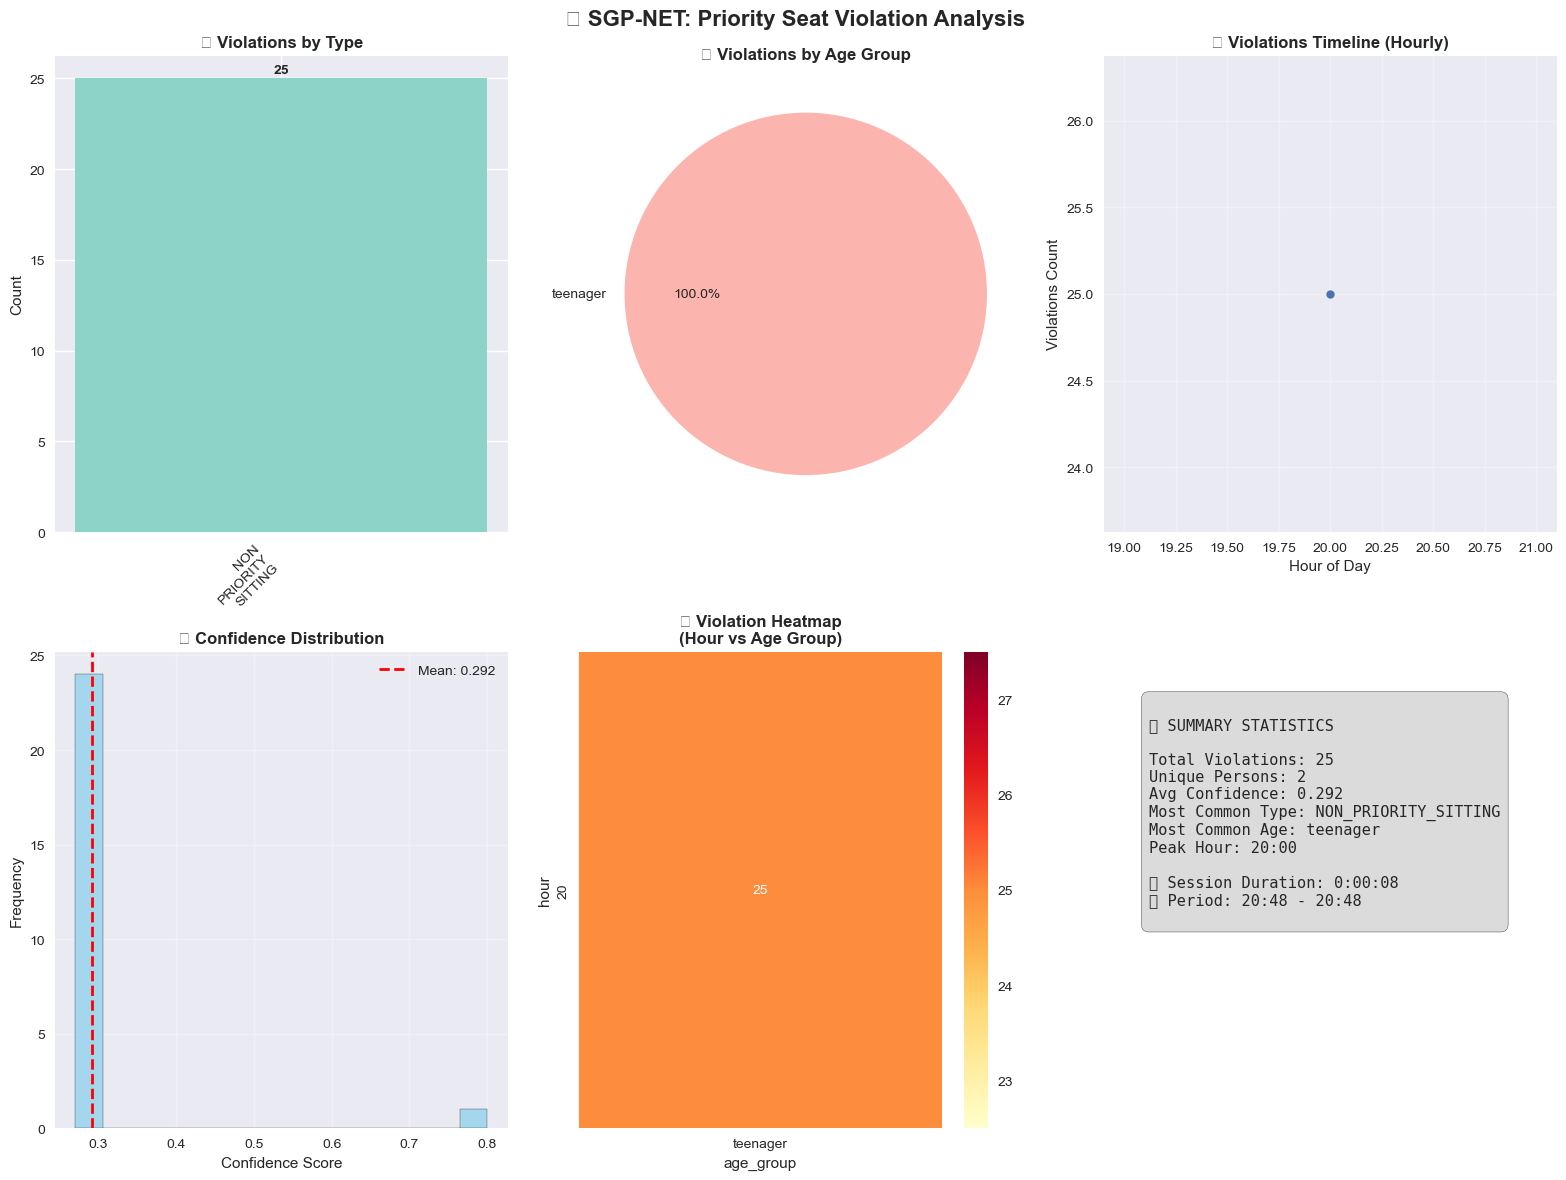

📁 Visualization saved as: sgp_violation_analysis_20250810_204857.png



👆 Press Enter to close the visualization... 



📊 SGP-NET VIOLATION SUMMARY:
Total Violations: 25
Average Confidence: 0.292

🚨 Violations by Type:
   NON_PRIORITY_SITTING: 25

👥 Violations by Age Group:
   teenager: 25

📅 Session Duration: 0:00:08
📁 Violation data exported to: sgp_violations_20250810_204900.csv
Data exported to sgp_violations_20250810_204900.csv
🚨 Violation logged: Person 5 - NON_PRIORITY_SITTING (teenager, conf: 0.27)
📁 SGP-NET detailed log dengan 3 deteksi (termasuk crutch info) disimpan ke sgp_net_detailed_log_20250810_204900.csv

🏁 SGP-NET SESSION FINAL STATISTICS
🚨 Violation logged: Person 5 - NON_PRIORITY_SITTING (teenager, conf: 0.27)
👥 DETECTION SUMMARY:
   Total People Detected: 4
   Valid Detections: 3
   Detection Success Rate: 75.0%

🏆 PRIORITY CLASSIFICATION:
   🟢 High Priority: 0 (0.0%)
   🔴 Non-Priority: 1 (33.3%)
   🟠 Needs Verification: 2 (66.7%)
   ⚪ Still Analyzing: 0 (0.0%)

👥 AGE DISTRIBUTION:
   Child: 0 (0.0%)
   Teenager: 2 (66.7%)
   Adult: 0 (0.0%)
   Elderly: 1 (33.3%)

🎯 MODEL PERFORMANC

In [ ]:
quick_start_sgp_comprehensive()